# (study) 2022년 파이썬 입문 기말고사
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Python]

## `0`. imports
아래코드를 이용하여 numpy, matplotlib, pandas를 import하라. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from IPython.display import HTML

## `1`. 기본문제 (50점)

`(1)` 도함수를 구하는 함수 `derivate`를 선언하라. 이 함수를 이용하여 $f(x)=x^2$의 그래프와 $f'(x)=2x$의 그래프를 $x \in (-1,1)$의 범위에서 그려라. 

In [2]:
def derivate(x):
    return ((x + 0.000000001)**2-(x**2))/0.000000001

In [3]:
derivate(2)

4.000000330961484

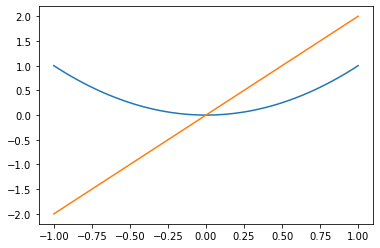

In [4]:
plt.plot(np.linspace(-1,1),np.linspace(-1,1)**2)
plt.plot(np.linspace(-1,1),derivate(np.linspace(-1,1)))

(풀이)

In [5]:
def f(x): 
    return x**2 

In [6]:
def derivate(f): 
    def df(x): 
        h=0.000000000001
        return (f(x+h)-f(x))/h 
    return df

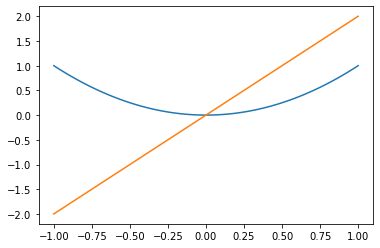

In [7]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))
plt.plot(x,derivate(f)(x))

`(2)` 적당한 클래스 정의하여 인스턴스 a를 만들고 print(a)의 출력결과가 본인의 학번이 나오도록 하라. 

```python
## 코드예시
class Klass:
    ???
    ???
a=Klass()
print(a)
```
```
## 출력결과
2022-43052
```

In [8]:
class Klass:
    def __init__(self,number = 202150754):
        self.number=number
    def _repr_html_(self):
        html_str = """
        {}""".format(self.number)
        return html_str

In [9]:
Klass()

(풀이)

In [10]:
class Klass:
    def __str__(self):
        return('2022-43052')

In [11]:
a=Klass()
print(a)

2022-43052


`(3)` for문이 실행될때마다 [묵,찌,빠] 중에 하나를 내며 빠를 누적 3회 낼경우 for문이 멈추는 이터레이터를 생성하라. 

In [12]:
class Klass: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self): 
        self.candidate = ["묵","찌","빠"] 
        self.add = []
    def __iter__(self):
        return self 
    def __next__(self):
        action = np.random.choice(self.candidate)
        self.add.append(action)
        if self.add.count("빠") == 3:
            print("빠가 3번 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [13]:
a = Klass()

In [14]:
for i in a:
    print(i)

묵
묵
찌
찌
찌
찌
빠
빠
찌
찌
빠가 3번 나와서 for문을 멈춥니다


(풀이)

In [15]:
class Klass: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self): 
        self.candidate = ["묵","찌","빠"] 
        self.dic = {'묵':0,'찌':0,'빠':0}
    def __iter__(self):
        return self 
    def __next__(self):
        action = np.random.choice(self.candidate)
        self.dic[action] += 1
        if self.dic['빠']==3:
            print("빠가 3번 누적되어 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [16]:
a=Klass()
for i in a:
    print(i)

묵
빠
찌
빠
찌
묵
찌
찌
찌
묵
찌
빠가 3번 누적되어 for문을 멈춥니다


***(4)-(6)*** 

In [17]:
class GS25: 
    n=0 
    total_number_of_guests = 0 
    def __init__(self):
        self.number_of_guests = 0 

`(4)` 위의 클래스를 수정하여 아래와 같이 GS25에서 새로운 인스턴스가 생성될때마다 
```
GS25의 점포수가 ?개로 늘었습니다.
``` 
라는 메시지가 출력되도록 하라. 

In [18]:
class GS25: 
    n=0 
    total_number_of_guests = 0 
    def __init__(self):
        self.number_of_guests = 0 
    def __add__(self): 
        self.number_of_guests=self.number_of_guests+1
        return self.number_of_guests #print("GS25의 점포수가 {}개로 늘었습니다.".format(self.number_of_guests))
    def _repr_html_(self):
        html_str = """
        GS25의 점포수가 {}개로 늘었습니다.
        """.format(self.number_of_guests)
        return html_str

In [19]:
gs = GS25()

In [20]:
gs.__add__()
gs

In [21]:
gs.__add__()
gs

In [22]:
gs.__add__()
gs

`(5)` 함수 `come`를 인스턴스 메소드로 정의하라. 이 메소드가 실행될때마다 각 점포의 손님 인스턴스 변수 `number_of_guests`와 클래스변수 `total_number_of_guests`를 1씩 증가시키고 아래의 메시지를 출력하라. 
```
새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 n명입니다. 
현재 GS25 점포를 방문한 손님수는 m명입니다. 
```

In [23]:
class GS25: 
    n=0 
    total_number_of_guests = 0 
    def __init__(self):
        self.number_of_guests = 0 
    def come(self): 
        self.number_of_guests=self.number_of_guests+1
        self.total_number_of_guests = self.total_number_of_guests+1
        print("새로운 손님이 오셨습니다!")
        print("GS25를 방문한 총 손님수는 {}명입니다.".format(self.total_number_of_guests))
        print("현재 GS25 점포를 방문한 손님수는 {}명입니다".format(self.number_of_guests))

In [24]:
gs = GS25()

In [25]:
gs.come()

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 1명입니다.
현재 GS25 점포를 방문한 손님수는 1명입니다


In [26]:
gs.come()

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 2명입니다.
현재 GS25 점포를 방문한 손님수는 2명입니다


In [27]:
gs.come()

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 3명입니다.
현재 GS25 점포를 방문한 손님수는 3명입니다


`(6)` 새로운 클래스메서드 show를 만들고 아래와 같은 메시지를 출력하도록 하라. 

```
GS25의 점포수: ??
GS25를 방문한 총 손님수: ??
```

In [28]:
class GS25: 
    n=0 
    total_number_of_guests = 0 
    def __init__(self):
        self.number_of_guests = 0
    def come(self):
        self.number_of_guests = self.number_of_guests+1
        self.total_number_of_guests = self.total_number_of_guests+1 
        print("새로운 손님이 오셨습니다!")
        print("GS25를 방문한 총 손님수는 {}명입니다.".format(self.total_number_of_guests))
        print("현재 GS25 점포를 방문한 손님수는 {}명입니다".format(self.number_of_guests))
    def show(self):
        self.number_of_guests = self.number_of_guests+1
        self.total_number_of_guests = self.total_number_of_guests+1 
        print("GS25의 점포수 : {}".format(self.number_of_guests))
        print("GS25를 방문한 총 손님수: {}".format(self.total_number_of_guests))

In [29]:
gs = GS25()

In [30]:
gs.show()

GS25의 점포수 : 1
GS25를 방문한 총 손님수: 1


In [31]:
gs.show()

GS25의 점포수 : 2
GS25를 방문한 총 손님수: 2


(사용예시) (4)-(6)을 모두 적용한 경우 사용예시는 아래와 같다. 

In [32]:
a=GS25() ## (4)의 사용예시

In [33]:
b=GS25() ## (4)의 사용예시

In [34]:
a.come() ## (5)의 사용예시

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 1명입니다.
현재 GS25 점포를 방문한 손님수는 1명입니다


In [35]:
a.come() ## (5)의 사용예시

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 2명입니다.
현재 GS25 점포를 방문한 손님수는 2명입니다


In [36]:
b.come() ## (5)의 사용예시

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 1명입니다.
현재 GS25 점포를 방문한 손님수는 1명입니다


In [ ]:
GS25.show() ## (6)의 사용예시

(풀이)

In [38]:
class GS25: 
    n=0 
    total_number_of_guests = 0 
    def __init__(self):
        self.number_of_guests = 0 
        GS25.n += 1 
        print("GS25의 점포수가 {}개로 늘었습니다.".format(GS25.n))
    def come(self):
        GS25.total_number_of_guests += 1 
        self.number_of_guests += 1
        print("새로운 손님이 오셨습니다!")
        print("GS25를 방문한 총 손님수는 {}명입니다.".format(GS25.total_number_of_guests))
        print("현재 GS25 점포를 방문한 손님수는 {}명입니다.".format(self.number_of_guests))
    @classmethod
    def show(cls):
        print("GS25의 점포수: {}".format(cls.n))
        print("GS25를 방문한 총 손님수: {}".format(cls.total_number_of_guests))

In [39]:
a=GS25() ## (4)의 사용예시

GS25의 점포수가 1개로 늘었습니다.


In [40]:
b=GS25() ## (4)의 사용예시

GS25의 점포수가 2개로 늘었습니다.


In [41]:
a.come() ## (5)의 사용예시

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 1명입니다.
현재 GS25 점포를 방문한 손님수는 1명입니다.


In [42]:
a.come() ## (5)의 사용예시

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 2명입니다.
현재 GS25 점포를 방문한 손님수는 2명입니다.


In [732]:
b.come() ## (5)의 사용예시

새로운 손님이 오셨습니다!
GS25를 방문한 총 손님수는 3명입니다.
현재 GS25 점포를 방문한 손님수는 1명입니다.


In [733]:
GS25.show() ## (6)의 사용예시

GS25의 점포수: 2
GS25를 방문한 총 손님수: 3


`(7)` `__eq__`는 연산 `==` 를 재정의하는 메소드이다. 클래스 `RPC_BASE`를 상속하여 새로운 클래스 RPC5를 만들라. 연산 `==`를 재정의하여 RPC5의 두 인스턴스의 action이 같은 경우 true를 리턴하는 기능을 구현하라. 

In [734]:
class RPC_BASE:
    def __init__(self):
        self.action = np.random.choice(['가위','바위','보'])

**hint:** Appendix를 참고할 것

**hint:** RPC5의 선언부분은 아래와 같은 형태를 가지고 있다. 

```python
class RPC5(???):
    def __eq__(self,other):
        return ??????
```

In [43]:
_a = [1,2,3]

In [295]:
class RPC5(RPC_BASE):
    def __eq__(self,orher):
        return self.action == orher

In [296]:
a=RPC5()
a.action

'가위'

In [297]:
b=RPC5()
b.action

'바위'

In [298]:
a==b

False

**hint:** RPC5클래스의 사용예시는 아래와 같다. 

In [ ]:
a=RPC5()
a.action

'바위'

In [ ]:
b=RPC5()
b.action

'보'

In [ ]:
a==b

False

(풀이)

In [735]:
class RPC7(RPC_BASE):
    def __eq__(self,other):
        return self.action == other.action 

In [736]:
a=RPC7()
a.action

'가위'

In [737]:
b=RPC7()
b.action

'바위'

In [738]:
a==b

False

`(8)` `__gt__`는 연산 `>` 를 재정의하는 메소드이다. 클래스 `RPC_BASE`를 상속하여 새로운 클래스 RPC6를 만들라. 연산 `>`를 재정의하여 RPC6의 두 인스턴스 a,b의 action이 각각 ('가위','보'), ('바위','가위'), ('보','바위') 인 경우 true를 리턴하는 기능을 구현하라. 

In [419]:
class RPC6(RPC_BASE):
    def __gt__(self,other):
        if ((self.action == '가위') and (other == '보')):
            return self.action > other
        else: 
            return self.action < other
        if ((self.action == '바위') and (other == '가위')):
            return self.action > other
        else: 
            return self.action < other
        if ((self.action == '보') and (other == '바위')):
            return self.action > other
        else: 
            return self.action < other

In [430]:
a=RPC6()
a.action

'보'

In [431]:
b=RPC6()
b.action

'바위'

In [432]:
a>b, a<b

(True, False)

**hint:** Appendix를 참고할 것

**hint:** RPC6클래스의 사용예시는 아래와 같다. 

In [ ]:
a=RPC6()
a.action

'바위'

In [ ]:
b=RPC6()
b.action

'보'

In [ ]:
a>b, a<b

(False, True)

(풀이)

In [739]:
class RPC8(RPC_BASE):
    def __gt__(self,other): # 연산 > 를 재정의 
        pair = self.action, other.action
        return pair == ('가위','보') or pair == ('바위','가위') or pair == ('보','바위') 

In [740]:
a=RPC8()
a.action

'바위'

In [741]:
b=RPC8()
b.action

'보'

In [742]:
a>b, a<b

(False, True)

***(9)-(10)***

아래와 같은 데이터프레임을 선언하고 물음에 답하라. 

In [433]:
np.random.seed(43052)
df=pd.DataFrame({'type':np.random.choice(['A','B'],100), 'score':np.random.randint(40,95,100)})
df

,type,score
0,B,45
1,A,40
2,B,79
3,B,46
4,B,57
...,...,...
95,B,69
96,A,71
97,A,93
98,A,63


`(9)` type=='A'의 평균score를 구하는 코드를 작성하라. 

In [455]:
df.query('type=="A"').iloc[:,1].mean()

68.4

(풀이)

In [743]:
m = df.query("type=='A'").score.mean()
m

68.4

`(10)` type=='A'의 평균score보다 같거나 큰 값을 가지는 행을 출력하라.

In [483]:
(df['score'] >= df.query('type=="A"').iloc[:,1].mean()).reset_index().query('score==True').reset_index().iloc[:,2].reset_index()

,index,score
0,0,True
1,1,True
2,2,True
3,3,True
4,4,True
5,5,True
6,6,True
7,7,True
8,8,True
9,9,True


(풀이)

In [ ]:
# 
# 아래모두 정답으로 인정 (문제설명이 불충분) 
# df.query("type=='A' and score >= @m") 
# df.query("score >= @m") 

## `2`. 가위, 바위, 보 하나빼기 (150점)

`(1)` 플레이어A는 (가위,가위) 중 하나를 선택할 수 있고 플레이어B는 (가위,바위) 중 하나를 선택할 수 있다. 각 플레이어는 각 패 중 하나를 랜덤으로 선택하는 액션을 한다고 가정하자.
아래에 해당하는 확률을 시뮬레이션을 이용하여 추정하라. 

- 플레이어A가 승리할 확률:
- 플레이어B가 승리할 확률:
- 플레이어A와 플레이어B가 비길 확률: 

**hint**: 50% 확률로 b가 승리하고 50% 확률로 비긴다. 

In [571]:
class RSP: 
    def __init__(self,candidate=['가위','바위']):
        self.candidate = candidate
        self.actions = list() 
        self.results = list()
    def __mul__(self,other):
        self.choose()
        other.choose()
        if self.actions[-1]=='가위' and other.actions[-1]=='가위':
            self.results.append(0)
            other.results.append(0)
        if self.actions[-1]=='가위' and other.actions[-1]=='바위':
            self.results.append(-1)
            other.results.append(1)
        if self.actions[-1]=='바위' and other.actions[-1]=='가위':
            self.results.append(1)
            other.results.append(-1)
    def choose(self):
        self.actions.append(np.random.choice(self.candidate))
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/> 
        액션: {} <br/>
        승패: {}
        """
        return html_str.format(self.candidate,self.actions,self.results)

In [585]:
a=RSP()
b=RSP(candidate=['가위','가위'])

In [586]:
for i in range(5):
    a*b

In [587]:
a

In [588]:
b

In [589]:
for i in range(50000):
    a*b

In [590]:
sum(a.results)/len(a.results)

0.498010198980102

In [591]:
sum(b.results)/len(a.results)

-0.498010198980102

(풀이)

In [745]:
class RPC:
    def __init__(self,candidate):
        self.candidate = candidate
        self.actions = list() 
        self.rewards = list()
        self.prob = [0.5,0.5]

    def __eq__(self,other): # 연산 == 를 재정의 
        return self.actions[-1] == other.actions[-1] 
        #note: 둘의 액션이 같으면 무승부 
    
    def __gt__(self,other): # 연산 > 를 재정의 
        pair = self.actions[-1], other.actions[-1]
        return pair == ('가위','보') or pair == ('바위','가위') or pair == ('보','바위') 
        #note: 가위>보, 바위>가위, 보>가위 
    
    def __mul__(self,other):
        # step1: 각자의 패를 선택 
        self.choose()
        other.choose()
        
        # step2: 승패 판단 + upate reward
        if self == other: # 무승부일경우 
            self.rewards.append(1)
            other.rewards.append(1)
        elif self > other: # self의 승리 
            self.rewards.append(2)
            other.rewards.append(0)
        else: # other의 승리 
            self.rewards.append(0)
            other.rewards.append(2)
        
        # step3: update data
        self.update_data()
        other.update_data()
    
    def update_data(self):
        self.data = pd.DataFrame({'actions':self.actions, 'rewards':self.rewards})
    
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/> 
        데이터: <br/>
        {}
        """        
        return html_str.format(self.candidate,self.data._repr_html_())
    
    def choose(self):
        self.actions.append(np.random.choice(self.candidate,p=self.prob))

In [746]:
PlayerA = RPC(['가위','가위']) 
PlayerB = RPC(['가위','바위']) 

for _ in range(100):
    PlayerA * PlayerB

In [747]:
print('플레이어A가 승리할 확률: {}'.format(sum(PlayerA.data.rewards==2)/100))
print('플레이어B가 승리할 확률: {}'.format(sum(PlayerA.data.rewards==0)/100))
print('플레이어A와 플레이어B가 비길 확률: {}'.format(sum(PlayerA.data.rewards==1)/100))

플레이어A가 승리할 확률: 0.0
플레이어B가 승리할 확률: 0.48
플레이어A와 플레이어B가 비길 확률: 0.52


`(2)` 문제 (1)과 같이 아래의 상황을 가정하자. 

||플레이어A|플레이어B|
|:-:|:-:|:-:|
|각 플레이어가 낼 수 있는 패 (candidate) | (가위,가위) | (가위,바위) |
|각 패를 선택할 확률 (prob) | (0.5,0.5) | (0.5,0.5) |



각 플레이어는 아래와 같은 규칙으로 가위바위보 결과에 따른 보상점수를 적립한다고 하자. 
- 승리: 보상점수 2점 적립
- 무승부: 보상점수 1점 적립
- 패배: 보상점수 0점 적립

100번째 대결까지 시뮬레이션을 시행하고 플레이어B가 가위를 낼 경우 얻은 보상점수의 총합과 바위를 낼 경우 얻은 보상점수의 총합을 각각 구하라. 플레이어B는 가위를 내는것이 유리한가? 바위를 내는것이 유리한가? 

**hint**: 플레이어B는 바위를 내는 것이 유리하다. 

**hint**: 플레이어B가 100번중에 49번 가위를 내고 51번 바위를 낸다면 플레이어B가 적립할 보상점수는 각각 아래와 같다. 
- 가위를 내었을 경우: 49 * 1 = 49점 
- 바위를 내었을 경우: 51 * 2 = 102점 
- 총 보상점수 = 49점 + 102점 = 151점 

In [710]:
class RSP: 
    def __init__(self,candidate=['가위','바위']):
        self.candidate = candidate
        self.actions = list() 
        self.results = list()
        self.points = list()
        self.rock = list()
        self.si = list()
    def __mul__(self,other):
        self.choose()
        other.choose()
        if self.actions[-1]=='가위' and other.actions[-1]=='가위':
            self.results.append(0)
            other.results.append(0)
            self.points.append(1)
            other.points.append(1)
            other.si.append(1)
            other.rock.append(1)
        if self.actions[-1]=='가위' and other.actions[-1]=='바위':
            self.results.append(-1)
            other.results.append(1)
            self.points.append(0)
            other.points.append(2)
            other.si.append(0)
            other.rock.append(2)
        if self.actions[-1]=='바위' and other.actions[-1]=='가위':
            self.results.append(1)
            other.results.append(-1)
            self.points.append(2)
            other.points.append(0)
            other.rock.append(2)
            other.si.append(0)
    def choose(self):
        self.actions.append(np.random.choice(self.candidate))
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/> 
        액션: {} <br/>
        승패: {} <br/>
        점수: {}
        """
        return html_str.format(self.candidate,self.actions,self.results,self.points)

In [711]:
a=RSP(candidate=['가위','가위'])
b=RSP()

In [712]:
for i in range(100):
    a*b

In [713]:
sum(a.points)

54

In [714]:
sum(b.points)

146

In [715]:
b.actions.count('가위')

54

In [716]:
b.actions.count('바위')

46

In [717]:
sum(b.si)

54

In [718]:
sum(b.rock)

146

(풀이)

In [748]:
print('플레이어B가 가위를 낼 경우 얻은 보상점수의 총합: {}'.format(PlayerB.data.query(" actions=='가위'").rewards.sum()))
print('플레이어B가 바위를 낼 경우 얻은 보상점수의 총합: {}'.format(PlayerB.data.query(" actions=='바위'").rewards.sum()))

플레이어B가 가위를 낼 경우 얻은 보상점수의 총합: 52
플레이어B가 바위를 낼 경우 얻은 보상점수의 총합: 96


바위 냈을 때 유리

`(3)` (2)에서 얻은 데이터를 **학습**하여 플레이어B가 "가위" 혹은 "바위" 를 선택할 확률을 매시점 조금씩 조정한다고 가정하자. 구체적으로는 현재시점까지 얻은 보상점수의 비율로 확률을 결정한다. 예를들어 플레이어B가 100회의 대결동안 누적한 보상점수의 총합이 아래와 같다고 하자. 

- 가위를 내었을 경우 보상점수 총합 = 50점 
- 바위를 내었을 경우 보상점수 총합 = 100점


그렇다면 플레이어B는 각각 (50/150,100/150) 의 확률로 (가위,바위) 중 하나를 선택한다. 101번째 대결에 플레이어B가 가위를 내서 비겼다면 이후에는 (51/151,100/151) 의 확률로 (가위,바위) 중 하나를 선택한다. 102번째 대결에 플레이어B가 바위를 내서 이겼다면 이후에는 각각 (51/153,102/153) 의 확률로 (가위,바위) 중 하나를 선택한다. 이러한 상황을 요약하여 표로 정리하면 아래와 같다. 


|시점|플레이어B가 가위를 냈을 경우 얻은 점수 총합|플레이어B가 바위를 냈을 경우 얻은 점수 총합| t+1시점에서 플레이어B가 (가위,바위)를 낼 확률|
|:-:|:-:|:-:|:-:|
|t=100|50|100| (50/150, 100/150)|
|t=101|51|100| (51/151, 100/151)|
|t=102|51|102| (51/153, 102/153)|


이러한 방식으로 500회까지 게임을 진행하며 확률을 수정하였을 경우 501번째 대결에서 플레이어B가 (가위,바위)를 낼 확률은 각각 얼마인가? 


**hint: 시간이 지날수록 플레이어B는 (가위,바위)중 바위를 내는 쪽이 유리하다는 것을 알게 될 것이다.**

(풀이) 

In [749]:
class RPC2(RPC):
    def __init__(self,candidate):
        # 기존내용
        self.candidate = candidate
        self.actions = list() 
        self.rewards = list()
        self.prob = [0.5,0.5]
        # 새롭게 정의하는 내용 
        self.data = dict()
        self.trainable=False # 학습모드 설정 
        
    def update_data(self):
        a = self.actions[-1]
        r = self.rewards[-1] 
        self.data[a] = self.data.get(a,0)+r 
        
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/> 
        확률: {} <br/>
        데이터: {} 
        """        
        return html_str.format(self.candidate,self.prob,self.data)
    
    def choose(self):
        if self.trainable:  # if self.trainalbe==True: 
            a1 = self.candidate[0] # action1 
            a2 = self.candidate[1] # action2 
            r1 = self.data[a1] # reward from action1 
            r2 = self.data[a2] # reward from action2 
            self.prob = [r1/(r1+r2), r2/(r1+r2)] 
        self.actions.append(np.random.choice(self.candidate,p=self.prob))

In [750]:
PlayerA=RPC2(['가위','가위'])
PlayerB=RPC2(['가위','바위'])

In [751]:
#
# 1~100 
PlayerA.trainable=False 
PlayerB.trainable=False 
for _ in range(100):
    PlayerA * PlayerB 
# 100~500     
PlayerA.trainable=False 
PlayerB.trainable=True
for _ in range(400):
    PlayerA * PlayerB 

In [752]:
PlayerB

---

앞으로 아래와 같은 용어를 사용한다. 
- ***(정의) 어떠한 플레이어가 양손 중 하나를 선택하는 확률을 데이터를 바탕으로 매 순간 업데이트 한다면 그 플레이어는 "학습모드 상태이다"고 표현한다.***
- ***(정의) 반대로 어떠한 플레이어가 양손 중 하나를 항상 동일한 확률로 낸다면 그 플레이어는 "학습모드 상태가 아니다"라고 표현한다.***

---

`(4)` 새로운 두명의 플레이어C와 플레이어D를 만들어라. 두 플레이어는 모두 동일하게 (가위,바위) 중 하나를 선택할 수 있다. 두 명의 플레이어는 100번째 대결까지는 두 가지 패중 하나를 랜덤하게 선택하고 101번째 대결부터 500번째 대결까지는 문제(3)의 플레이어B와 같은 방식으로 확률을 업데이트 하여 두 가지 패를 서로 다른 확률로 낸다고 하자. 즉 100번째 대결까지는 두 플레이어가 모두 학습모드 상태가 아니고 101번째부터 500번째 대결까지는 두 플레이어가 모두 학습모드 상태이다. 500번째 대결까지의 학습이 끝났을 경우 플레이어 C와 플레이어D가 각 패를 낼 확률은 각각 얼마인가? 

|시점|플레이어C가 (가위,바위)를 낼 확률|플레이어D가 (가위,바위)를 낼 확률|비고|
|:-:|:-:|:-:|:-:|
|t <= 100|  (1/2, 1/2)|  (1/2, 1/2)| 양쪽 플레이어 모두 학습모드가 아님|
|t <= 500| 대결 데이터를 학습하여 수정한 확률| 대결 데이터를 학습하여 수정한 확률| 양쪽 플레이어 모두 학습모드임 |

**hint: 시간이 지날수록 두 플레이어 모두 바위를 내는 쪽이 유리하다는 것을 알게 될 것이다.**

(풀이)

In [753]:
PlayerC=RPC2(['가위','바위'])
PlayerD=RPC2(['가위','바위'])

In [754]:
#
# 1~100 
PlayerC.trainable=False 
PlayerD.trainable=False 
for _ in range(100):
    PlayerC * PlayerD
# 100~500     
PlayerC.trainable=True
PlayerD.trainable=True
for _ in range(400):
    PlayerC * PlayerD 

In [755]:
PlayerC

In [756]:
PlayerD

`(5)` 새로운 플레이어 E와 F를 생각하자. 플레이어E와 플레이어F는 각각 (가위,바위) 그리고 (가위,보) 중 하나를 선택할 수 있다고 가정하자. 시뮬레이션 대결결과를 이용하여 아래의 확률을 근사적으로 추정하라. 

- 플레이어E가 승리할 확률:
- 플레이어F가 승리할 확률:
- 플레이어E와 플레이어F가 비길 확률: 

**hint: 플레이어E가 가위를 낸다면 최소한 지지는 않기 때문에 플레이어E가 좀 더 유리한 패를 가지고 있다. 따라서 플레이어E의 결과가 더 좋을 것이다.**

(풀이)

In [757]:
PlayerE=RPC(['가위','바위'])
PlayerF=RPC(['가위','보']) 

for _ in range(100):
    PlayerE * PlayerF

print('플레이어E가 승리할 확률: {}'.format(sum(PlayerE.data.rewards==2)/100))
print('플레이어F가 승리할 확률: {}'.format(sum(PlayerE.data.rewards==0)/100))
print('플레이어E와 플레이어F가 비길 확률: {}'.format(sum(PlayerE.data.rewards==1)/100))

플레이어E가 승리할 확률: 0.52
플레이어F가 승리할 확률: 0.2
플레이어E와 플레이어F가 비길 확률: 0.28


`(6)` (5)와 동일한 두 명의 플레이어E, F를 생각하자. 두 플레이어는 100회까지는 랜덤으로 자신의 패를 선택한다. 그리고 101회부터 500회까지는 플레이어F만 데이터로 부터 학습을 하여 수정된 확률을 사용한다. 500번의 대결이 끝나고 플레이어F가 (가위,보)를 선택하는 확률이 어떻게 업데이트 되어있는가?

|시점|플레이어E가 (가위,바위)를 낼 확률|플레이어F가 (가위,보)를 낼 확률|비고|
|:-:|:-:|:-:|:-:|
|t <= 100|  (1/2, 1/2) |  (1/2, 1/2)| 양쪽 플레이어 모두 학습모드가 아님|
|t <= 500| (1/2, 1/2) | 데이터를 학습하여 수정한 확률 | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |

**hint: 플레이어F는 보를 내는 것이 낫다고 생각할 것이다. (가위를 내면 지거나 비기지만 보를 내면 지거나 이긴다.)**

(풀이)

In [758]:
PlayerE=RPC2(['가위','바위'])
PlayerF=RPC2(['가위','보'])

In [759]:
#
# 1~100 
PlayerE.trainable=False 
PlayerF.trainable=False 
for _ in range(100):
    PlayerE * PlayerF
# 100~500     
PlayerE.trainable=False
PlayerF.trainable=True
for _ in range(400):
    PlayerE * PlayerF

In [760]:
PlayerE

In [761]:
PlayerF

`(7)` (6)번의 플레이어E와 플레이어F가 500회~1000회까지 추가로 게임을 한다. 이번에는 플레이어E만 데이터로부터 학습한다. 1000회까지 대결을 끝낸 이후 플레이어E가 (가위,바위)를 내는 확률은 어떻게 업데이트 되었는가? 

|시점|플레이어E가 (가위,바위)를 낼 확률|플레이어F가 (가위,보)를 낼 확률|비고|
|:-:|:-:|:-:|:-:|
|t <= 100|  (1/2, 1/2) |  (1/2, 1/2)| 양쪽 플레이어 모두 학습모드가 아님|
|t <= 500| (1/2, 1/2) | 데이터를 학습하여 수정한 확률 | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |
|t <= 1000| 데이터를 학습하여 수정한 확률 | t=500시점에 업데이트된 확률 | 플레이어E는 학습모드 / 플레이어F는 학습모드아님 |


**hint: 플레이어F는 보를 내도록 학습되어 있다. 따라서 플레이어E가 바위를 내면 지고 가위를 내면 이길것이다. 따라서 플레이어E는 가위가 유리하다고 생각할 것이다.**

`(8)` (7)번의 플레이어E와 플레이어F가 1000회~30000회까지 추가로 게임을 한다. 이번에는 플레이어F만 데이터로부터 학습한다. 30000회까지 대결을 끝낸 이후 플레이어F가 (가위,보)를 내는 확률은 어떻게 업데이트 되었는가? 


|시점|플레이어E가 (가위,바위)를 낼 확률|플레이어F가 (가위,보)를 낼 확률|비고|
|:-:|:-:|:-:|:-:|
|t <= 100|  (1/2, 1/2) |  (1/2, 1/2)| 양쪽 플레이어 모두 학습모드가 아님|
|t <= 500| (1/2, 1/2) | 데이터를 학습하여 수정한 확률 | 플레이어E는 학습모드아님 / 플레이어F는 학습모드 |
|t <= 1000| 데이터를 학습하여 수정한 확률 | t=500시점에 업데이트된 확률 | 플레이어E는 학습모드 / 플레이어F는 학습모드아님 |
|t <= 30000|   t=1000시점에 업데이트된 확률 |  데이터를 학습하여 수정한 확률 |  플레이어E는 학습모드아님 / 플레이어F는 학습모드 |

**hint: 플레이어F는 원래 보가 유리하다고 생각하여 보를 자주 내도록 학습되었다. 하지만 플레이어E가 그러한 플레이어F의 성향을 파악하고 가위를 주로 내도록 학습하였다. 플레이어F는 그러한 플레이어E의 성향을 다시 파악하여 이번에는 가위을 자주 내는 것이 유리하다고 생각할 것이다.**

(풇이)

In [762]:
# 
# 500~1000     
PlayerE.trainable=True
PlayerF.trainable=False
for _ in range(500):
    PlayerE * PlayerF

In [763]:
PlayerE

In [764]:
PlayerF

`(9)` 플레이어E와 플레이어F의 대결기록을 초기화 한다. 이번에는 플레이어F가 항상 (3/4)의 확률로 가위를 (1/4)의 확률로 보를 낸다고 가정한다. 플레이어E는 100번의 대결까지는 랜덤으로 (가위,바위)중 하나를 내고 101번째 대결부터 1000번째 대결까지는 대결 데이터를 학습하여 수정한 확률을 사용한다고 하자. 1000번째 대결이후에 플레이어E가 (가위,바위)를 내는 확률이 어떻게 업데이트 되어있는가? 

|시점|플레이어E가 (가위,바위)를 낼 확률|플레이어F가 (가위,보)를 낼 확률|비고|
|:-:|:-:|:-:|:-:|
|t <= 100|  (1/2, 1/2) |  (3/4, 1/4)| 양쪽 플레이어 모두 학습모드가 아님|
|t <= 1000| 데이터를 학습하여 수정한 확률 | (3/4, 1/4) | 플레이어E는 학습모드 / 플레이어F는 학습모드 아님 |

(풀이)

In [765]:
PlayerE=RPC2(['가위','바위'])
PlayerF=RPC2(['가위','보'])

In [766]:
#
# 1~100 
PlayerE.trainable=False 
PlayerF.trainable=False 
PlayerF.prob=[3/4,1/4]
for _ in range(100):
    PlayerE * PlayerF
# 100~1000     
PlayerE.trainable=True
PlayerF.trainable=False
for _ in range(900):
    PlayerE * PlayerF

In [767]:
PlayerE

> 바위가 좀 더 유리하게 나온다

(추가풀이)

In [768]:
# 계속시행한다면?
PlayerE.trainable=True
PlayerF.trainable=False
for _ in range(10000*100):
    PlayerE * PlayerF

In [769]:
PlayerE

> E가 가위를 냈을경우 보상의 기대값은 $1\times 3/4 + 2 \times 1/4 = 5/4$ 이고 바위를 냈을경우 보상의 기대값은 $2\times 3/4 + 0 \times 1/4 = 6/4$ 이므로 바위가 더 유리하다. 따라서 점점 바위를 내도록 학습한다. 

`(10)` 플레이어E와 플레이어F의 대결기록을 초기화 한다. 이번에는 플레이어F가 항상 (2/3)의 확률로 가위를 (1/3)의 확률로 보를 낸다고 가정한다. 플레이어E는 100번의 대결까지는 랜덤으로 (가위,바위)중 하나를 내고 101번째 대결부터 1000번째 대결까지는 대결 데이터를 학습하여 수정한 확률을 사용한다고 하자. 1000번째 대결이후에 플레이어E가 (가위,바위)를 내는 확률이 어떻게 업데이트 되어있는가? 

|시점|플레이어E가 (가위,바위)를 낼 확률|플레이어F가 (가위,보)를 낼 확률|비고|
|:-:|:-:|:-:|:-:|
|t <= 100|  (1/2, 1/2) |  (2/3, 1/3)| 양쪽 플레이어 모두 학습모드가 아님|
|t <= 1000| 데이터를 학습하여 수정한 확률 | (2/3, 1/3) | 플레이어E는 학습모드 / 플레이어F는 학습모드 아님 |

In [770]:
PlayerE=RPC2(['가위','바위'])
PlayerF=RPC2(['가위','보'])

In [771]:
#
# 1~100 
PlayerE.trainable=False 
PlayerF.trainable=False 
PlayerF.prob=[2/3,1/3]
for _ in range(100):
    PlayerE * PlayerF
# 100~1000     
PlayerE.trainable=True
PlayerF.trainable=False
for _ in range(900):
    PlayerE * PlayerF

In [772]:
PlayerE

In [773]:
PlayerF

> E가 가위를 냈을경우 보상의 기대값은 $1\times 2/3 + 2 \times 1/3 = 4/3$ 이고 바위를 냈을 경우 보상의 기대값은 $2\times 2/3 + 0 \times 1/3 = 4/3$ 이므로 가위도 바위도 유리하지 않다. 따라서 가위와 바위를 어떠한 확률로 내든 상관없다. 

***문제2의 추가해설***

(프로그래밍 팁)

기본적인 구현기능인 RPC클래스를 상속을 이용하여 적절하게 modify하면 문제를 쉽게 풀 수 있습니다. 문항에 따라서 어떤것은 기본 RPC클래스를 쓰는것이 유리하고 어떠한 것은 새로운 클래스를 정의하는 것이 유리할 수 있습니다. 예를들어 2-(1),(2),(5)는 RPC클래스를 그대로 쓰는 것이 유리했으며 나머지는 새로운 클래스인 RPC2를 사용하는것이 문제풀이에 유리했습니다. 

(계산팁)

추가확률을 계산할 경우 pandas의 dataframe을 이용하는 것보다 RPC2에서 제가 구현한 것 처럼 dict와 같은 내장자료형을 이용하는 것이 훨씬 연산속도가 빠릅니다. 가령 8번문제의 경우 알고리즘에 따라서 연산시간이 오래걸릴 수도 있는데 제가 짠 코드를 기반으로 코랩에서 돌리면 2.4116초 정도로 결과를 얻을 수 있습니다. 연산속도의 차이가 나는 이유는 (1) 기본적으로 판다스는 느리며 (2) RPC의 data에는 모든 자료를 저장는데 RPC2의 data는 각 패를 내었을 경우 보상의 누적만 저장하기 때문입니다. 최근 데이터량의 증가로 인하여 알고리즘의 효율성을 생각해야할 때도 있는데요, 본인이 구현한 코드와 정답코드를 비교해가며 계산시간을 테스트해보는것도 좋은 경험일 것 같습니다. 계산시간을 측정하는 것은 4월18일 강의노트에 사용한 방법을 참고하시면 됩니다. 

(약간의 개념해설)

이 문제는 제로섬게임의 확장입니다. (양쪽 플레이어의 보상합이 일정하므로 이러한 게임을 constantsum 이라고 부릅니다) 어떤 분은 이 문제를 보고 게임이론을 떠올릴 수 있고 어떤 분은 강화학습을 떠올렸을 것 같습니다. 

문제의 포인트는 상대방의 전략에 따라서 나의 최적전략이 끝없이 달라진다는 점입니다. 문항 (5)-(10)까지의 문제는 이러한 상황을 묘사합니다. 직관적으로는 더 좋은패를 가지고 있는 플레이어E가 유리할 듯 하지만 결국 상대의 패를 보고 전략을 끝없이 수정하면 어떠한 하나의 action도 최적이 될 수 없습니다. 이 문제의 경우 문항 (8)의 시점에서는 둘 다 가위를 내도록 업데이트 되었는데 이를 이용하여 플레이어E가 다시 바위를 낼 수 있고 그 심리를 역이용하여 플레이어F가 다시 보를 낼 수 있고 그 심리를 다시 역이용하여 플레이어E가 다시 가위를 내며 그 심리를 역이용하여 플레이어F는 다시 가위를 낼 수 있어 무한반복이 됩니다. (상대도 바보가 아니거든요.)

하지만 두 가지 액션을 확률로 선택한다면 문항 (10)의 상황과 같이 상대방이 어떠한 선택을 하더라도 유리한 선택이 존재하지 않는 어떠한 균형점이 존재할 수 있는데 이를 내쉬의 균형이라 합니다. 내쉬의 균형에 따르면 플레이어E는 가위와 바위를 2:1의 비율로 플레이어F는 가위와 보를 2:1로 낼때 서로가 서로의 전략을 바꾸지 않는 균형상태에 도달합니다. 이러한 게임의 셋팅에 대하여 좀 더 관심 있으신 분은 게임이론을 참고하셔서 공부해보시기 바랍니다. (저도 기본적인 내용밖에 모르지만 흥미있는 분야입니다) 

만약 주어진 게임환경에서 플레이어E,F가 (에이전트라고 부릅니다) 전략을 학습하는 과정이 흥미롭게 느껴졌다면 강화학습을 한번 참고해보시기 바랍니다. 강화학습은 알파고를 학습시킨것으로 유명한 알고리즘입니다. 아래영상은 컴퓨터플레이어가 벽돌깨기 게임을 하며 데이터를 쌓고 데이터로 부터 적절한 action을 학습하는 과정을 묘사한 영상입니다. 

- https://www.youtube.com/watch?v=TmPfTpjtdgg

여러분들이 기말고사에서 간단히 만들어본 알고리즘의 발전형입니다. 강화학습에 흥미가 있으시면 방학동안에 공부해보시길 바랍니다. (궁금한 점은 제 메일로 질문하셔도 됩니다, 제가 게임이론은 전공이 아니지만 강화학습은 좀 할줄 알거든요 ㅎㅎ) 



## Appendix

`-` 아래의 클래스를 참고하여 문제1,2을 풀어라. (5월25일 강의노트에 소개된 클래스를 약간 정리한 것) 
- 참고하지 않아도 감점은 없음

In [ ]:
class RPC:
    def __init__(self,candidate):
        self.candidate = candidate
        self.actions = list() 
        self.rewards = list()
        self.prob = [0.5,0.5]

    def __eq__(self,other): # 연산 == 를 재정의 
        return self.actions[-1] == other.actions[-1] 
        #note: 둘의 액션이 같으면 무승부 
    
    def __gt__(self,other): # 연산 > 를 재정의 
        pair = self.actions[-1], other.actions[-1]
        return pair == ('가위','보') or pair == ('바위','가위') or pair == ('보','바위') 
        #note: 가위>보, 바위>가위, 보>가위 
    
    def __mul__(self,other):
        # step1: 각자의 패를 선택 
        self.choose()
        other.choose()
        
        # step2: 승패 판단 + upate reward
        if self == other: # 무승부일경우 
            self.rewards.append(1)
            other.rewards.append(1)
        elif self > other: # self의 승리 
            self.rewards.append(2)
            other.rewards.append(0)
        else: # other의 승리 
            self.rewards.append(0)
            other.rewards.append(2)
        
        # step3: update data
        self.update_data()
        other.update_data()
    
    def update_data(self):
        self.data = pd.DataFrame({'actions':self.actions, 'rewards':self.rewards})
    
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/> 
        데이터: <br/>
        {}
        """        
        return html_str.format(self.candidate,self.data._repr_html_())
    
    def choose(self):
        self.actions.append(np.random.choice(self.candidate,p=self.prob))

`-` 사용예시

In [ ]:
a=RPC(['가위','가위'])
b=RPC(['가위','보'])

In [ ]:
for i in range(5):
    a*b

In [ ]:
a

,actions,rewards
0,가위,2
1,가위,2
2,가위,1
3,가위,2
4,가위,2


In [ ]:
b

,actions,rewards
0,보,0
1,보,0
2,가위,1
3,보,0
4,보,0
